In [54]:
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
df = pd.read_csv("/Users/vishalbarad/Desktop/Python/classification/mtcars.csv")
df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [56]:
#here we first er drop Unnamed 0 column
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [57]:
#here we standardize data to the same scale
from sklearn.preprocessing import StandardScaler

In [58]:
#here our targer data is column 'am'(auto or menual) car so we drop 'am' from feature(traing data)
scaler = StandardScaler()
scaler_features=scaler.fit_transform(df.drop('am',axis=1))

In [59]:
df.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object')

In [60]:
df_features = pd.DataFrame(scaler_features,columns=['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs','gear','carb'])
     

In [61]:
df_features.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,gear,carb
0,0.153299,-0.106668,-0.579750,-0.543655,0.576594,-0.620167,-0.789601,-0.881917,0.430331,0.746967
1,0.153299,-0.106668,-0.579750,-0.543655,0.576594,-0.355382,-0.471202,-0.881917,0.430331,0.746967
2,0.456737,-1.244457,-1.006026,-0.795570,0.481584,-0.931678,0.432823,1.133893,0.430331,-1.140108
3,0.220730,-0.106668,0.223615,-0.543655,-0.981576,-0.002336,0.904736,1.133893,-0.946729,-1.140108
4,-0.234427,1.031121,1.059772,0.419550,-0.848562,0.231297,-0.471202,-0.881917,-0.946729,-0.511083


## Train test split

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
x_train, x_test, y_train, y_test =  train_test_split(df_features,df['am'],test_size=0.3)

## Now use KNN

In [64]:
#let k=1
from sklearn.neighbors import KNeighborsClassifier

In [65]:
knn = KNeighborsClassifier(n_neighbors=20)

In [66]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [67]:
pred = knn.predict(x_test)

## Prediction and evaluation

In [68]:
from sklearn.metrics import confusion_matrix,classification_report ,accuracy_score

In [69]:
print(confusion_matrix(y_test,pred))

[[6 0]
 [4 0]]


In [70]:
print(accuracy_score(y_test,pred))

0.6


In [71]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75         6
           1       0.00      0.00      0.00         4

    accuracy                           0.60        10
   macro avg       0.30      0.50      0.37        10
weighted avg       0.36      0.60      0.45        10



/Users/vishalbarad/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Choosing a good K value

In [72]:
from sklearn.model_selection import cross_val_score
accuracy_rate=[]
for i in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn,df_features,df['am'],cv=10)
    accuracy_rate.append(score.mean())

In [73]:
#or we can also find error rate
error_rate=[]
for i in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn,df_features,df['am'],cv=5)
    error_rate.append(1-score.mean())#here for error rate just 1-score.mean()

Text(0, 0.5, 'error_rate')

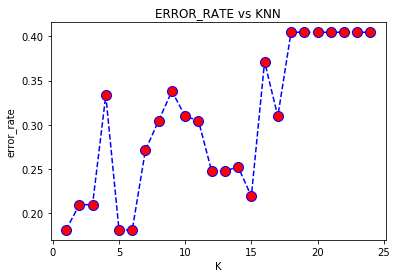

In [74]:
plt.plot(range(1,25),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title("ERROR_RATE vs KNN")
plt.xlabel("K")
plt.ylabel("error_rate")

Text(0, 0.5, 'accuracy_rate')

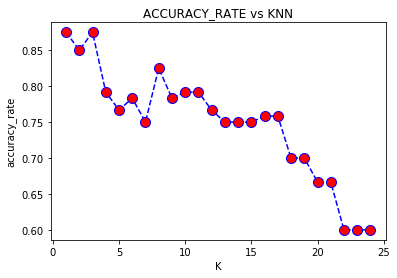

In [75]:
plt.plot(range(1,25),accuracy_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title("ACCURACY_RATE vs KNN")
plt.xlabel("K")
plt.ylabel("accuracy_rate")

## here in error_rate k>5 error rate is continuosly increasing andsame as in accuracy_rate k>5 accuracy continuously decreasing so we take k=6

In [76]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)
print(confusion_matrix(y_test,pred))


[[6 0]
 [1 3]]


In [77]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.75      0.86         4

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



# Now as we see if we take k=20 then F1-score  was low and if take k=6 then F1-score was high so our model works good